dataset = https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [ ]:
import pandas as pd

# Assuming your dataset is in a text file with tab-separated values
file_path = "/content/drive/MyDrive/CODEWAY/Genre Classification Dataset/train_data.txt"
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows to understand the structure
print(df.head())


  1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.
0  2 ::: Cupid (1997) ::: thriller ::: A brother ...                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
train_data = pd.read_csv(r'/content/drive/MyDrive/CODEWAY/Genre Classification Dataset/train_data.csv', sep = ",")
train_data.to_csv('train_data.csv', index= False)
train_data.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


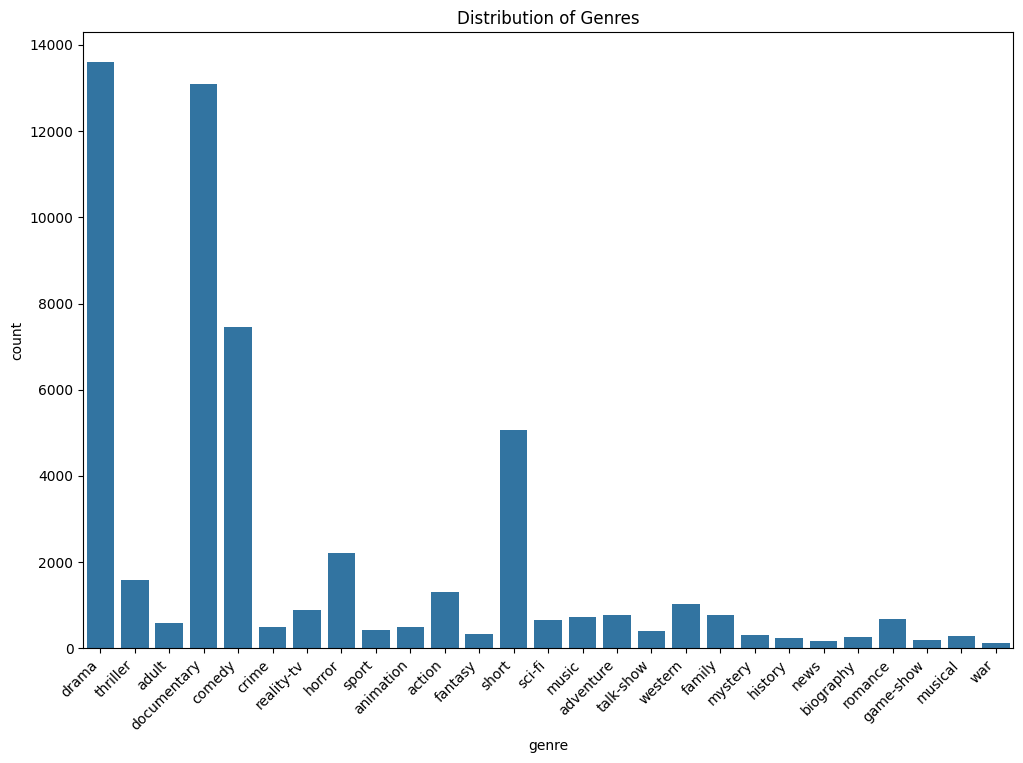

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger plot size
plt.figure(figsize=(12, 8))

# Rotate x-axis labels for better readability
sns.countplot(x='genre', data=train_data)
plt.title('Distribution of Genres')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation angle as needed

plt.show()


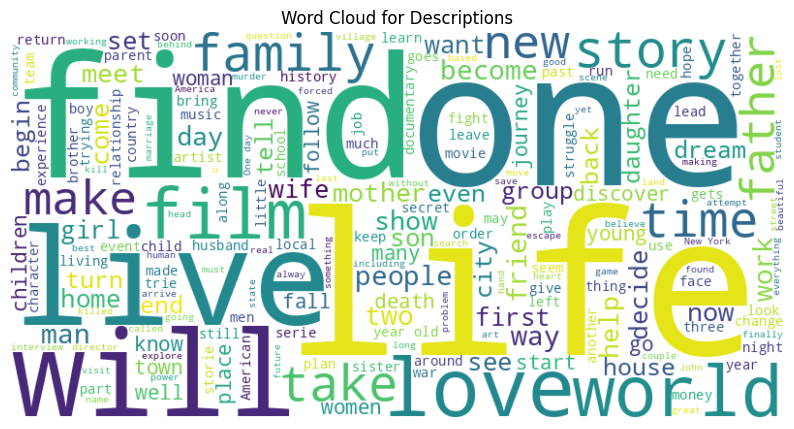

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['description']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions')
plt.show()


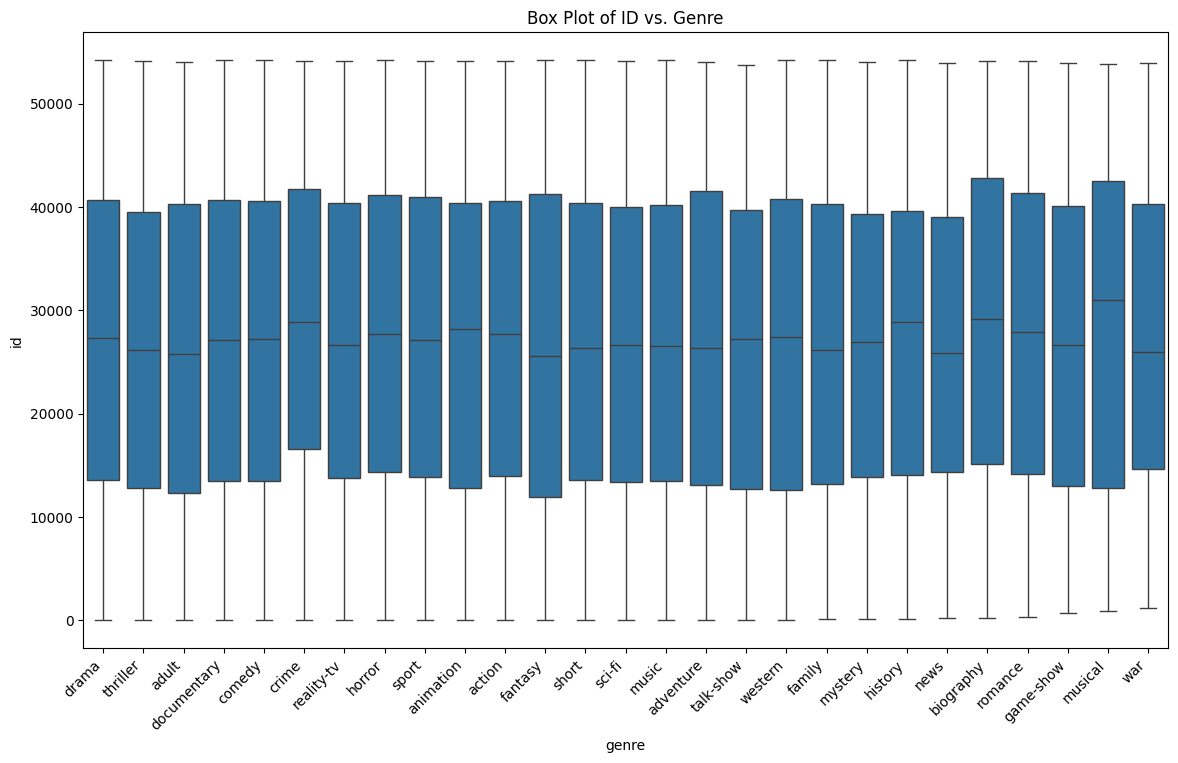

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger plot size
plt.figure(figsize=(14, 8))

# Box plot for 'id' vs. 'genre' with adjusted labels
sns.boxplot(x='genre', y='id', data=train_data)
plt.title('Box Plot of ID vs. Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust the rotation angle and font size as needed

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train, test = train_test_split(train_data, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Text preprocessing and vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train['description'])
X_test_tfidf = tfidf_vectorizer.transform(test['description'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the genre labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train['genre'])
y_test_encoded = label_encoder.transform(test['genre'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_regression_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.59
Precision: 0.56
Recall: 0.59
F1 Score: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


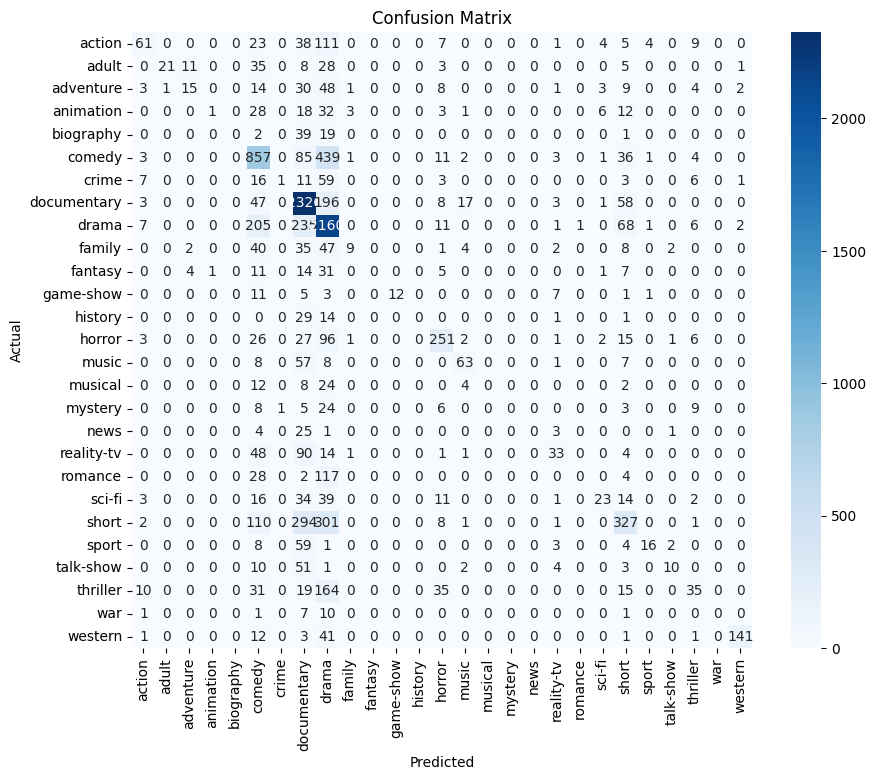

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()